# **Project Description**
*Your goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. There are two cities, **San Juan** and **Iquitos**, with test data for each city spanning 5 and 3 years respectively. **You will make one submission that contains predictions for both cities.** The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.*

- Project link: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/#features_list

### Import All Libraries We Need It

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm,tree
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

### Read Data

In [5]:
X_train=pd.read_csv('dengue_features_train.csv')
y_train=pd.read_csv('dengue_labels_train.csv')

### Show Features shape

In [6]:
X_train.shape

(1456, 24)

In [7]:
X_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [8]:
y_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


Assume that the both data are sorted (i would not join using  x.city=y.city and x.year=y.year and x.weekofyear=y.weekofyear )

In [9]:
data1 = X_train.copy()
data1['total_cases'] = y_train['total_cases'].astype(int)

In [10]:
data1.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


### Description about the features


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

<b><i>City and date indicators</i></b><br/>
<b>city</b> – City abbreviations: sj for San Juan and iq for Iquitos<br/>
<b>week_start_date</b> – Date given in yyyy-mm-dd format<p/>

<b><i>Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements</i></b><br/>
<b>ndvi_se</b> – Pixel southeast of city centroid<br/>
<b>ndvi_sw</b> – Pixel southwest of city centroid<br/>
<b>ndvi_ne</b> – Pixel northeast of city centroid<br/>
<b>ndvi_nw</b> – Pixel northwest of city centroid<br/>

<b><i>NOAA's GHCN daily climate data weather station measurements</i></b><br/>
<b>station_max_temp_c</b> – Maximum temperature<br/>
<b>station_min_temp_c</b> – Minimum temperature<br/>
<b>station_avg_temp_c</b> – Average temperature<br/>
<b>station_precip_mm</b> – Total precipitation<br/>
<b>station_diur_temp_rng_c</b> – Diurnal temperature range<p/>
<b><i>PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)</i></b><br/>
<b>precipitation_amt_mm</b> – Total precipitation<p/>
<b><i>NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)</i></b><br/>
<b>reanalysis_sat_precip_amt_mm</b> – Total precipitation<br/>
<b>reanalysis_dew_point_temp_k</b> – Mean dew point temperature<br/>
<b>reanalysis_air_temp_k</b> – Mean air temperature<br/>
<b>reanalysis_relative_humidity_percent</b> – Mean relative humidity<br/>
<b>reanalysis_specific_humidity_g_per_kg</b> – Mean specific humidity<br/>
<b>reanalysis_precip_amt_kg_per_m2</b> – Total precipitation<br/>
<b>reanalysis_max_air_temp_k</b> – Maximum air temperature<br/>
<b>reanalysis_min_air_temp_k</b> – Minimum air temperature<br/>
<b>reanalysis_avg_temp_k</b> – Average air temperature<br/>
<b>reanalysis_tdtr_k</b> – Diurnal temperature range<p/>


### Step 1: Check Nulls and Duplicates

In [12]:
np.sum(data1.duplicated())

0

In [13]:
data1.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

#### Check how many row have null value if is not many drop all of it

In [14]:
print(data1.shape)
print(data1.dropna().shape)

print("There is " + str(data1.shape[0] - data1.dropna().shape[0]) + " have at least one null value")

(1456, 25)
(1199, 25)
There is 257 have at least one null value


#### too many NULL VALUES so fill it by mean or median bs ana h3mlha bal KNNRegressor

# Step 2: Fill Null

In [15]:
data2 = data1.copy()

### Explore Category Null values & will find there is no null vluaes in category to fill it by mode for example

In [16]:
data2.select_dtypes('object').loc[:, data2.isna().sum() > 0].columns

Index([], dtype='object')

### Numeric Missing values

### Explore Numerical features

In [17]:
data2.select_dtypes(np.number).loc[:, data2.isna().sum() > 0].columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

### Fill null values using KNNRegressor

In [18]:
def Knn_impute(df, na_target): # na_target -> column have null values
    """ 
        Take data frame and column
        return data frame with filling missing value in column
        by using Knn algorithm
    """
    df = df.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[:,numeric_df.isna().sum() == 0].columns

    # y_train: rows that not have null values in column(na_target)
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    # X_train: columns that not have null values (non_na_column) & select from these column rows that not have null values
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    # X_test:  columns that not have null values (non_na_column) & select from these column rows that have null values
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]

    """ 
    KNN Regressor vs classifier
    The key differences are: KNN regression tries to predict the value of the output variable by using a local average.
    KNN classification attempts to predict the class to which the output variable belong by computing the local probability. 
    """
    # fa7na mstkhdmeen KneKNeighborsRegressor 3shan hya numeric value
    knn = KNeighborsRegressor(n_neighbors=15)
    knn.fit(X_train, y_train)

    # hna hyrg3 al perdict ll null values alna kount 3ayz amlaha
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred

    return df

In [21]:
data3 = data2.copy()
for column in ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']: 
       
   data3 = Knn_impute(data3,column)

In [22]:
data3.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

# Step 3: Understand the distribution of the data

In [23]:
data4 = data3.copy()

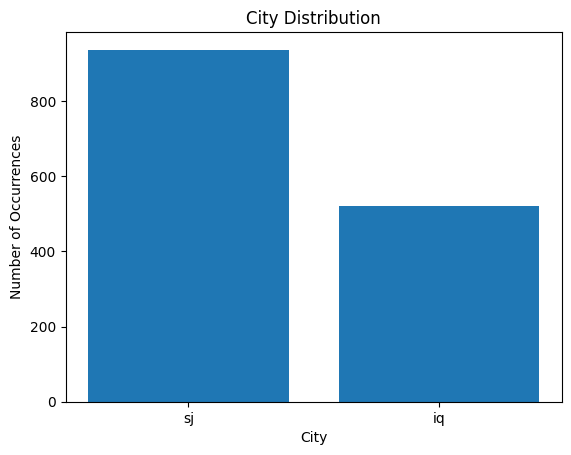

In [24]:
city_counts = data4['city'].value_counts()

plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Occurrences')
plt.title('City Distribution')
plt.show()

In [25]:
def getMonth(row):
    date=row['week_start_date']
    month = int(date.split('-')[1] )
    return month

months = data4.apply(getMonth,axis=1)
test_cases = data4['total_cases']

In [26]:
time_month = np.zeros(13)
for i in range(len(months)):
    time_month[months.iloc[i]]+=test_cases.iloc[i]

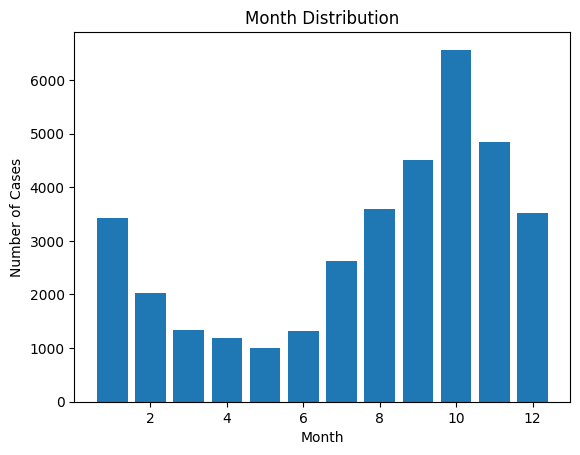

In [27]:
plt.bar(range(1,13),time_month[1:])
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Month Distribution')
plt.show()

I observe that the disease increases in the summer

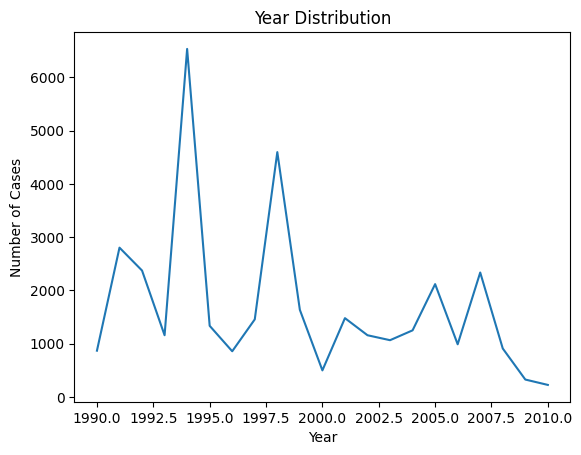

In [28]:
time_year = np.zeros(21)
for i in range(len(data4)):
    time_year[data4['year'].iloc[i]-1990]+=test_cases.iloc[i].astype(int)

plt.plot(range(1990,2011),time_year)
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Year Distribution')
plt.show()


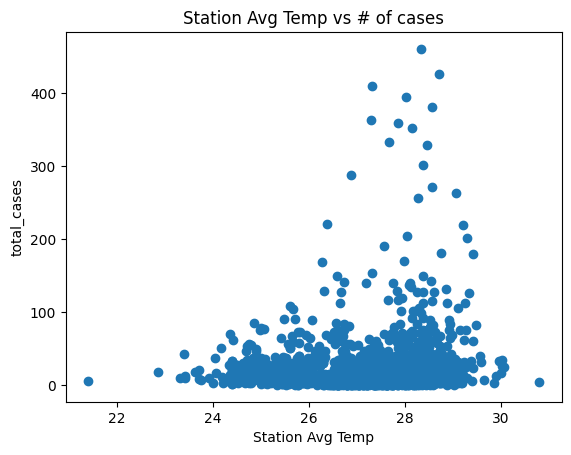

In [29]:
# plot station_avg_temp_c against total_cases
plt.scatter(data4['station_avg_temp_c'], data4['total_cases'])
plt.xlabel('Station Avg Temp')
plt.ylabel('total_cases')
plt.title('Station Avg Temp vs # of cases')
plt.show()


No direct relation between station average temperature and the number of cases

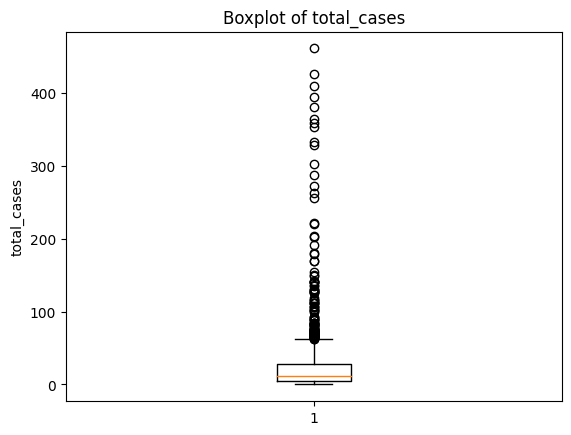

In [30]:
plt.boxplot(data4['total_cases'])
plt.ylabel('total_cases')
plt.title('Boxplot of total_cases')
plt.show()

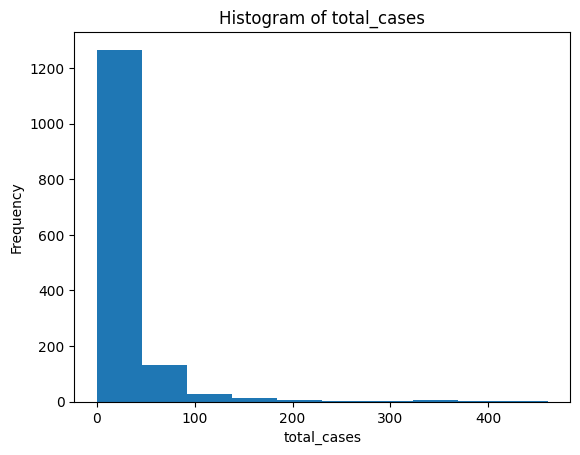

In [31]:
# draw histogram of total_cases
plt.hist(data4['total_cases'])
plt.xlabel('total_cases')
plt.ylabel('Frequency')
plt.title('Histogram of total_cases')
plt.show()

As we can see from the Box Plot diagram and the histogram of the Total Cases, number above ~75 are outliers, So, i am going to remove them

# Step 4: Convert categorical data and Normalize the data

In [32]:
data5 = data4.copy()

In [33]:
# convert city to 0 and 1
data5['city']=data5['city'].map({'sj':0,'iq':1})

In [34]:
# Drop week_start_date column, i think it is not important
data5=data5.drop('week_start_date',axis=1)

In [35]:
data5.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [36]:
# # Normalize all the columns except the city column and the total_cases column
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Normalize all columns
for col in data5.columns:
    if col not in ['city','total_cases','year','weekofyear']:
        scaler = RobustScaler()
        data5[col]=scaler.fit_transform(data5[col].values.reshape(-1,1))

In [37]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   int64  
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   ndvi_ne                                1456 non-null   float64
 4   ndvi_nw                                1456 non-null   float64
 5   ndvi_se                                1456 non-null   float64
 6   ndvi_sw                                1456 non-null   float64
 7   precipitation_amt_mm                   1456 non-null   float64
 8   reanalysis_air_temp_k                  1456 non-null   float64
 9   reanalysis_avg_temp_k                  1456 non-null   float64
 10  reanalysis_dew_point_temp_k            1456 non-null   float64
 11  rean

In [38]:
from sklearn.decomposition import PCA

In [39]:
X_train, X_val, Y_train, Y_val = train_test_split(data5.iloc[:,:-1], data5.iloc[:,-1], test_size = 0.2)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((1164, 23), (292, 23), (1164,), (292,))

In [40]:
pca = PCA(n_components=5)

# Fit the PCA model and transform the features
features_pca = pca.fit_transform(X_train)
X_val = pca.transform(X_val)

# Create a DataFrame with the reduced features
columns_pca = [f'PCA_{i+1}' for i in range(5)]
df_pca = pd.DataFrame(features_pca, columns=columns_pca)
X_val = pd.DataFrame(X_val, columns=columns_pca)

X_train = df_pca.copy()

In [41]:
X_train

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,6.352313,-5.502975,1.087720,-1.140790,-0.790686
1,13.349919,-6.854827,2.071717,-0.482716,-0.393858
2,-8.565151,1.571361,-1.525610,-0.482303,-0.482646
3,18.373588,-4.107257,-2.406384,0.817164,-0.534034
4,14.509217,0.673068,0.078092,-1.143203,-1.475544
...,...,...,...,...,...
1159,-22.601058,0.220018,2.440909,0.221371,2.600071
1160,-23.551855,4.959531,-1.429907,-1.540799,0.699445
1161,-5.439277,2.376550,-0.874552,1.125511,-1.642789
1162,-21.627075,-0.123698,-1.449653,-0.671508,0.159936


In [42]:
X_val

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,-12.533104,-0.213596,3.349253,0.007416,0.397512
1,21.322100,-6.968711,1.595771,1.932350,3.387082
2,6.612414,2.985491,-0.362442,1.875387,-1.250994
3,-6.647424,-3.652111,-0.811419,2.535880,2.191113
4,6.407633,-0.454710,1.042320,-3.844150,-1.371485
...,...,...,...,...,...
287,12.576994,1.785656,-0.286246,1.831477,-0.616508
288,8.621877,4.863766,0.040165,0.105856,-1.050403
289,24.506844,3.677980,-1.547978,-1.489625,-0.200175
290,-19.564987,-2.785821,1.488573,-0.378840,-1.988783


# Step 6: Apply ML

In [43]:
batch_size = 3

In [44]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

# Creating a sequential model
model = Sequential()
model.add(Dense(X_train.shape[1], activation='swish'))
model.add(Dense(8, activation='swish'))
model.add(Dropout(0.5))


model.add(Dense(8, activation='swish'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='relu'))
# Compiling the model
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adamax(learning_rate=0.001), metrics=['mae'])
model.build(
    input_shape = (batch_size,X_train.shape[1]))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (3, 5)                    30        
                                                                 
 dense_1 (Dense)             (3, 8)                    48        
                                                                 
 dropout (Dropout)           (3, 8)                    0         
                                                                 
 dense_2 (Dense)             (3, 8)                    72        
                                                                 
 dropout_1 (Dropout)         (3, 8)                    0         
                                                                 
 dense_3 (Dense)             (3, 1)                    9         
                                                                 
Total params: 159 (636.00 Byte)
Trainable params: 159 

In [290]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_mae', patience=5, verbose=1)


In [291]:
Y_train.unique()

array([  1,   5,   2,  11,   0,  89, 140,  16,   7,  14,   4,  22,  31,
        13,   6,   8, 115,  21,  19, 129,  10,  12,  32,  23,  24,   9,
        71,  17,  18,   3,  34,  15,  67,  26,  43,  72,  38,  20, 102,
        60,  42,  44,  28,  25,  36,  40,  29,  56,  35,  76,  66,  62,
        59,  37,  30,  27, 202,  55,  68, 116,  47,  41,  54,  46,  53,
       150,  33,  70, 135,  64,  83,  61,  49,  80,  74,  65,  50, 127,
        45,  75, 108,  99, 131, 204, 256, 106,  51, 101, 104, 329, 112,
        82,  52, 191, 170,  73,  85, 119, 169,  57,  92,  58,  63, 181,
       141,  77,  90, 220,  48,  39, 263, 128])

In [292]:
# Training the model
model.fit(X_train, Y_train,validation_data=(X_val, Y_val), epochs=300, batch_size=batch_size,callbacks=[early_stopping])


Epoch 1/300
320/320 [==============================] - 2s 3ms/step - loss: 1439.0023 - mae: 20.8627 - val_loss: 1180.6324 - val_mae: 21.2897
Epoch 2/300
320/320 [==============================] - 1s 3ms/step - loss: 1432.9315 - mae: 20.7359 - val_loss: 1172.3481 - val_mae: 21.1262
Epoch 3/300
320/320 [==============================] - 1s 3ms/step - loss: 1423.8607 - mae: 20.5429 - val_loss: 1163.6007 - val_mae: 20.9464
Epoch 4/300
320/320 [==============================] - 1s 3ms/step - loss: 1415.2715 - mae: 20.4031 - val_loss: 1153.9279 - val_mae: 20.7451
Epoch 5/300
320/320 [==============================] - 1s 3ms/step - loss: 1408.7198 - mae: 20.2384 - val_loss: 1144.0939 - val_mae: 20.5399
Epoch 6/300
320/320 [==============================] - 1s 3ms/step - loss: 1399.6329 - mae: 20.0314 - val_loss: 1135.6803 - val_mae: 20.3650
Epoch 7/300
320/320 [==============================] - 1s 3ms/step - loss: 1394.5059 - mae: 19.9663 - val_loss: 1127.1346 - val_mae: 20.1915
Epoch 8/300
3

In [1]:
#models
#2 multilinear 
#3 SCM, RPF --> with grid search
#4 single linear
#5 multipoly regression 
#6 LDA 

In [53]:
LR_model = LinearRegression()
 
LR_model.fit(X_train, Y_train)
y_pred = LR_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  19.824358723455838


In [46]:
SVM_model = svm.SVR()
SVM_model.fit(X_train, Y_train)
y_pred = SVM_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)


MAE:  14.06131803993979


In [55]:
DT_model = tree.DecisionTreeRegressor(max_depth=500,max_leaf_nodes=1000)
DT_model.fit(X_train, Y_train)
y_pred = DT_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  11.027397260273972


In [54]:
RF_model = RandomForestClassifier(n_estimators=100,max_depth=500,max_leaf_nodes=1000)
RF_model.fit(X_train, Y_train)
y_pred = RF_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  11.732876712328768


In [56]:
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)
y_pred = NB_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  19.60958904109589


In [57]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, Y_train)
y_pred = KNN_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  14.284246575342467


In [58]:
NN_model = MLPClassifier(
    hidden_layer_sizes=(150,), 
    max_iter=1000,
    learning_rate='adaptive',
    batch_size=32,
    activation='relu',
    solver='adam',
    learning_rate_init=0.01
)
NN_model.fit(X_train, Y_train)
y_pred = NN_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  18.041095890410958


In [59]:
from sklearn.ensemble import BaggingRegressor

regressors = [
    ('DT', tree.DecisionTreeRegressor(max_depth=500, max_leaf_nodes=1000)),
    ('SVM', svm.SVR()),
    ('LR', LinearRegression())
]


bagging_regressor = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)


bagging_regressor.fit(X_train, Y_train)

y_pred_bagging = bagging_regressor.predict(X_val)


mae_bagging = mean_absolute_error(Y_val, y_pred_bagging)
print("MAE using Bagging: ", mae_bagging)

MAE using Bagging:  10.59486301369863


1) How about make model for SJ and a model for IQ independant ?<br>
2) How about making voting method ?

# Step 7: Apply ML for test set

In [ ]:
X_test=pd.read_csv('dengue_features_test.csv')

X_test['city']=X_test['city'].map({'sj':0,'iq':1})

X_test=X_test.drop('week_start_date',axis=1)

for col in X_test.columns:
    if col not in ['city','total_cases']:
        X_test[col]=(X_test[col]-mins[col])/(maxs[col]-mins[col])

In [ ]:
X_test.isnull().any()

The testset contain Nulls, we need to deal with it first

In [ ]:
# tab3n 8lt ene a3mel drop ll test cases
X_test.dropna(inplace=True)

In [168]:
y_test_pred = SVM_model.predict(X_test)
out = X_test[['city','year','weekofyear']]
out['total_cases']=y_test_pred

# Denormalize the ['city','year','weekofyear'] col
out.to_csv('out.csv',index=False,header=True)

/tmp/ipykernel_6775/2861913588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['total_cases']=y_test_pred
